In [4]:
import pandas as pd
import numpy as mp
df = pd.read_csv("data_dt.csv")
df.shape

(14, 6)

In [5]:
df.head()

,ID,Age,Income,Gender,Martial Status,Buys
0,1,0-21,High,Male,Single,No
1,2,0-21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,35-100,Medium,Male,Single,Yes
4,5,35-100,Low,Female,Single,Yes


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Martial Status'] = le.fit_transform(df['Martial Status'])
df['Buys'] = le.fit_transform(df['Buys'])

In [7]:
df.head()

,ID,Age,Income,Gender,Martial Status,Buys
0,1,0,0,1,1,0
1,2,0,0,1,0,0
2,3,1,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size = 0.2, random_state = 10)
print(len(x_train))
print(len(x_test))

11
3


In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(model, x_train, y_train, cv=3)

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Cross-validation scores: [0.75 1.   0.  ]
Mean Accuracy: 0.5833333333333334
Standard Deviation: 0.42491829279939874


In [12]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


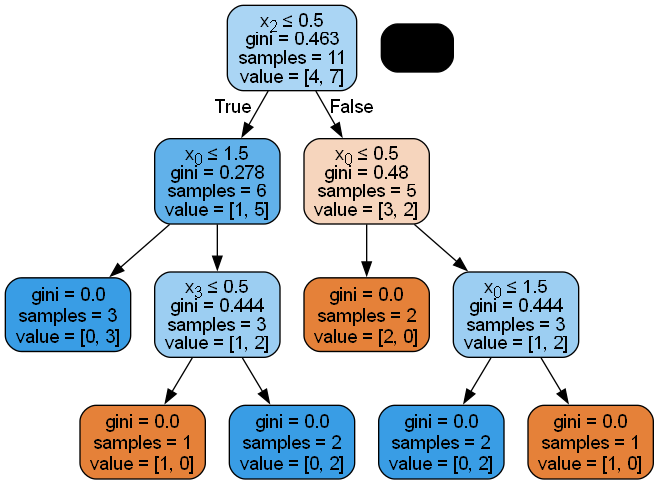

In [15]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train) 

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())